In [1]:
from ase.io import read
from hubbard.data import AtomicData
from hubbard.gutz import GhostGutzwiller
from hubbard.utils.tools import setup_seed
from hubbard.utils.tools import get_semicircle_e_list
import numpy as np
from hubbard.data import _keys

setup_seed(123)
U = 0.5
J = 0.0 * U # 0.25 * U
Up = U - 2*J
Jp = J

alpha = 1.
V = 1.0
ep = -1.0
e_list = get_semicircle_e_list(nmesh=1000)

eks = np.zeros((len(e_list), 2, 2))+0j
eks += np.array([[[0.,  V],
                 [V,   ep]]],dtype=np.complex128)
eks[:,1,1] += alpha * e_list

phy_onsite = {
    "C": np.array([
        [[-U/2, 0.],
        [0., 0.]]
    ]),
}

intparams = {"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]}

gga = GhostGutzwiller(
    atomic_number=np.array([6]),
    nocc=3,
    basis={"C":[1,1]},
    idx_intorb={"C":[0]},
    naux=3,
    intparams=intparams,
    nspin=4,
    kBT=0.0002,
    mutol=1e-6,
    solver="ED",
    decouple_bath=True,
    natural_orbital=False,
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=False,
    solver_options={}#{"mfepmin":2000, "channels": 10, "Ptol": 1e-5},
)

atomicdata = AtomicData.from_ase(
    read("../../hubbard/test/C_cube.vasp"),
    r_max=3.1
    )

# atomicdata["kpoint"] = torch.tensor(kmesh_sampling([10,10,10], True)).to(torch.get_default_dtype())
# block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)
atomicdata[_keys.HAMILTONIAN_KEY] = eks
atomicdata[_keys.PHY_ONSITE_KEY] = phy_onsite
atomicdata = gga.idp_phy(atomicdata)

In [2]:
gga.run(atomicdata, 1000, 1e-3)

DM_kin:  [0.00992037 0.00992037 0.50047442 0.50047442 0.98965505 0.98965505
 0.99994985 0.99994985]
 -- Current error: 3.01359
DM_kin:  [8.19232688e-04 8.19232689e-04 5.01781537e-01 5.01781537e-01
 9.97399481e-01 9.97399481e-01 9.99999976e-01 9.99999976e-01]
 -- Current error: 1.43538
DM_kin:  [8.35721206e-04 8.35721207e-04 5.01649132e-01 5.01649132e-01
 9.97514830e-01 9.97514830e-01 9.99999890e-01 9.99999890e-01]
 -- Current error: 1.01060
DM_kin:  [8.73922062e-04 8.73922062e-04 5.01563255e-01 5.01563255e-01
 9.97562841e-01 9.97562841e-01 9.99999598e-01 9.99999598e-01]
 -- Current error: 0.71204
DM_kin:  [9.19008152e-04 9.19008152e-04 5.01526289e-01 5.01526289e-01
 9.97555535e-01 9.97555535e-01 9.99998805e-01 9.99998805e-01]
 -- Current error: 0.50252
DM_kin:  [9.64900669e-04 9.64900670e-04 5.01539096e-01 5.01539096e-01
 9.97498573e-01 9.97498573e-01 9.99997071e-01 9.99997071e-01]
 -- Current error: 0.35558
DM_kin:  [0.0010088  0.0010088  0.50159952 0.50159952 0.99739731 0.99739731
 0

{'C': array([[[ 6.03109622e-01,  2.43748682e-12,  1.76418294e-01,
          -3.96793322e-12, -1.25967249e-02,  5.69973459e-13,
           0.00000000e+00,  0.00000000e+00],
         [ 2.43748682e-12,  6.03109622e-01, -3.53439051e-12,
           1.76418294e-01,  4.99780609e-13, -1.25967249e-02,
           0.00000000e+00,  0.00000000e+00],
         [ 1.76418294e-01, -3.53439051e-12,  6.32663807e-02,
          -2.35066954e-12, -2.31887346e-02, -2.34769335e-12,
           0.00000000e+00,  0.00000000e+00],
         [-3.96793322e-12,  1.76418294e-01, -2.35066954e-12,
           6.32663807e-02, -2.11292569e-12, -2.31887346e-02,
           0.00000000e+00,  0.00000000e+00],
         [-1.25967249e-02,  4.99780609e-13, -2.31887346e-02,
          -2.11292569e-12,  9.97217545e-01, -9.07364788e-14,
           0.00000000e+00,  0.00000000e+00],
         [ 5.69973459e-13, -1.25967249e-02, -2.34769335e-12,
          -2.31887346e-02, -9.07364788e-14,  9.97217545e-01,
           0.00000000e+00,  0.00000000

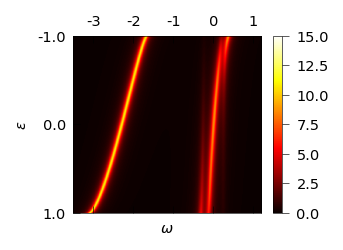

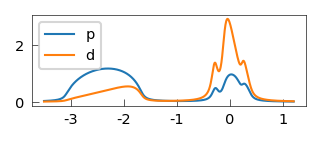

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

mpl.rcParams['axes.linewidth'] =0.3
mpl.rcParams['xtick.major.width'] =0.3
mpl.rcParams['ytick.major.width'] =0.3
# eks = alpha * (-np.cos(np.linspace(-1,1, 300)*np.pi))[:,None,None] * np.eye(2)[None,:,:] + 0j
# eks[:,0,0] = 0.
# eks += np.array([[[0.,  V],
#                  [V,   ep]]],dtype=np.complex128)
# # eks[:,1,1] += alpha * e_list
# atomicdata[_keys.HAMILTONIAN_KEY] = eks

Es = np.linspace(-3.5,1.2, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=atomicdata, eta=0.06)
ARPES = -(1/np.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
pdos = ARPES.sum(0) / ARPES.shape[0]
pdos = pdos.reshape(-1,2,2).sum(-1)
dos = pdos.sum(-1)
ARPES = ARPES.sum(-1)
ntick = 3


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,))
fig, ax = plt.subplots(figsize=(6./2.54,4.5/2.54), dpi=150)
m = ax.matshow(ARPES, cmap="hot", vmin=0, vmax=15)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_ylabel(r"$\epsilon$", fontsize=7)
ax.set_xlabel(r"$\omega$", fontsize=7)
labels = np.array([-3,-2,-1,0,1])
ticks = [np.abs(Es-gga.E_fermi-i).argmin() for i in labels]
ax.set_xticks(ticks=ticks, labels=labels, fontsize=7)
ax.set_yticks(ticks=np.linspace(0,ARPES.shape[0],ntick), labels=np.linspace(1,-1,ntick)[::-1], fontsize=7)
fig.colorbar(m).ax.tick_params(labelsize=7) 
plt.tick_params(direction='in')
plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(6,4))
# m = ax.matshow(ARPES[:,::-1].T, cmap="hot", vmin=0, vmax=15)
# ax.set_aspect('auto')  # override the default 'equal'
# ax.set_xlabel(r"k/$\pi$")
# ax.set_ylabel(r"$E-E_f (eV)$")
# ax.set_yticks(ticks=np.linspace(0,ARPES.shape[1],ntick), labels=np.linspace(-5,5,ntick)[::-1])
# ax.set_xticks(ticks=np.linspace(0,ARPES.shape[0],ntick), labels=np.linspace(1,-1,ntick)[::-1])
# fig.colorbar(m)
# plt.show()

plt.figure(figsize=(6./2.54,2/2.54), dpi=150)
# plt.plot(Es, dos)
plt.plot(Es-gga.E_fermi, pdos[:,::-1], lw=1)
plt.xticks(ticks=(Es-gga.E_fermi)[np.stack(ticks)], labels=[-3,-2,-1,0,1], fontsize=7)
plt.yticks(fontsize=7)
plt.legend(["p", "d"], fontsize=7)
plt.tick_params(direction='in')
plt.show()

# Sweep for metal states

In [ ]:
from tqdm import tqdm
from IPython.display import clear_output
records_metal = {}
not_converge_medal = []
for i, ep in tqdm(enumerate([3, 2, 1, 0, -0.5, -1, -2, -3]), desc="Scanning for ep: "):
    gga.reset()
    U_list = [1.,2.,3.,4.,5.,6.,7.,8.]
    for U in tqdm(U_list, desc="Scanning for U: "):
        J = 0.0 * U # 0.25 * U
        Up = U - 2*J
        Jp = J
        alpha = 1.
        V = 1.0

        intparams = {"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]}
        gga.update_intparam(intparams)

        eks = np.zeros((len(e_list), 2, 2))+0j
        eks += np.array([[[0.,  V],
                        [V,   ep]]],dtype=np.complex128)
        eks[:,1,1] += alpha * e_list

        phy_onsite = {
            "C": np.array([
                [[-U/2, 0.],
                [0., 0.]]
            ]),
        }
        atomicdata[_keys.HAMILTONIAN_KEY] = eks
        atomicdata[_keys.PHY_ONSITE_KEY] = phy_onsite

        # run
        try:
            gga.run(atomicdata, 1000, 1e-4)
            records_metal[(ep, U)] = (gga.RDM, gga.R, gga.gGAtomic.docc)
        except:
            # gga reset states
            gga.reset()
            try:
                gga.run(atomicdata, 1000, 1e-4)
                records_metal[(ep, U)] = (gga.RDM, gga.R, gga.gGAtomic.docc)
            except:
                gga.reset()
                not_converge_medal.append((ep, U))
            
        clear_output()

Scanning for U: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]
Scanning for ep: : 8it [14:31, 108.94s/it]


# Sweep for insulator states

In [ ]:
from tqdm import tqdm
from IPython.display import clear_output

records_in = {}
not_converge_in = []
for i, ep in tqdm(enumerate([-3, -2, -1, -0.5, 0, 1, 2, 3]), desc="Scanning for ep: "):
    gga.reset()
    U_list = [10.,9.,8.,7.,6.,5.,4.,3.,2.,1.]
    for U in tqdm(U_list, desc="Scanning for U: "):
        J = 0.0 * U # 0.25 * U
        Up = U - 2*J
        Jp = J
        alpha = 1.
        V = 1.0

        intparams = {"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]}
        gga.update_intparam(intparams)

        eks = np.zeros((len(e_list), 2, 2))+0j
        eks += np.array([[[0.,  V],
                        [V,   ep]]],dtype=np.complex128)
        eks[:,1,1] += alpha * e_list

        phy_onsite = {
            "C": np.array([
                [[-U/2, 0.],
                [0., 0.]]
            ]),
        }
        atomicdata[_keys.HAMILTONIAN_KEY] = eks
        atomicdata[_keys.PHY_ONSITE_KEY] = phy_onsite

        # run
        try:
            gga.run(atomicdata, 1000, 1e-4)
            records_in[(ep, U)] = (gga.RDM, gga.R, gga.gGAtomic.docc)
        except:
            # gga reset states
            gga.reset()
            try:
                gga.run(atomicdata, 1000, 1e-4)
                records_in[(ep, U)] = (gga.RDM, gga.R, gga.gGAtomic.docc)
            except:
                gga.reset()
                not_converge_in.append((ep, U))
            
        clear_output()

Scanning for U: 100%|██████████| 10/10 [06:22<00:00, 38.23s/it]
Scanning for ep: : 8it [1:29:05, 668.24s/it]


In [7]:
records_in.keys()

dict_keys([(-3, 10.0), (-3, 9.0), (-3, 8.0), (-3, 7.0), (-3, 6.0), (-3, 5.0), (-3, 4.0), (-3, 3.0), (-3, 2.0), (-3, 1.0), (-2, 10.0), (-2, 9.0), (-2, 8.0), (-2, 7.0), (-2, 6.0), (-2, 5.0), (-2, 4.0), (-2, 3.0), (-2, 2.0), (-2, 1.0), (-1, 10.0), (-1, 9.0), (-1, 8.0), (-1, 7.0), (-1, 6.0), (-1, 5.0), (-1, 4.0), (-1, 3.0), (-1, 2.0), (-1, 1.0), (-0.5, 10.0), (-0.5, 9.0), (-0.5, 8.0), (-0.5, 7.0), (-0.5, 6.0), (-0.5, 5.0), (-0.5, 4.0), (-0.5, 3.0), (-0.5, 2.0), (-0.5, 1.0), (0, 10.0), (0, 9.0), (0, 8.0), (0, 7.0), (0, 6.0), (0, 5.0), (0, 4.0), (0, 3.0), (0, 2.0), (0, 1.0), (1, 10.0), (1, 9.0), (1, 8.0), (1, 7.0), (1, 6.0), (1, 5.0), (1, 4.0), (1, 3.0), (1, 2.0), (1, 1.0), (2, 10.0), (2, 9.0), (2, 8.0), (2, 7.0), (2, 6.0), (2, 5.0), (2, 4.0), (2, 3.0), (2, 2.0), (2, 1.0), (3, 10.0), (3, 9.0), (3, 8.0), (3, 7.0), (3, 6.0), (3, 5.0), (3, 4.0), (3, 3.0), (3, 2.0), (3, 1.0)])

In [2]:
docc_m = []
nps_m = []
nds_m = []
eps_m = []
Us_m = []
for ep_, U_ in records_metal:
    RDM, R, docc = records_metal[(ep_,U_)]
    RDM = RDM["C"][0]
    R = R["C"][0]
    docc = docc["C"][0]
    docc_m.append(docc[0])
    nps_m.append(RDM[2,2]+RDM[3,3])
    nds_m.append(RDM[0,0]+RDM[1,1])
    eps_m.append(ep_)
    Us_m.append(U_)
eps_m = np.array(eps_m)
Us_m = np.array(Us_m)
docc_m = np.array(docc_m)
nps_m = np.array(nps_m)
nds_m = np.array(nds_m)

In [3]:
docc_i = []
nps_i = []
nds_i = []
eps_i = []
Us_i = []
for ep_, U_ in records_in:
    RDM, R, docc = records_in[(ep_,U_)]
    RDM = RDM["C"][0]
    R = R["C"][0]
    docc = docc["C"][0]
    docc_i.append(docc[0])
    nps_i.append(RDM[2,2]+RDM[3,3])
    nds_i.append(RDM[0,0]+RDM[1,1])
    eps_i.append(ep_)
    Us_i.append(U_)
eps_i = np.array(eps_i)
Us_i = np.array(Us_i)
docc_i = np.array(docc_i)
nps_i = np.array(nps_i)
nds_i = np.array(nds_i)

# Line Graph

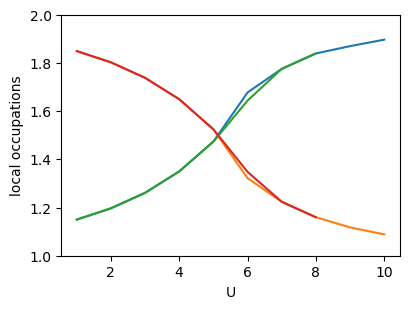

In [4]:
import matplotlib.pyplot as plt


idx = 6
plt.figure(figsize=(4,3))
plt.plot(Us_i.reshape(-1,10)[idx][::-1], nps_i.reshape(-1,10)[idx][::-1])
plt.plot(Us_i.reshape(-1,10)[idx][::-1], nds_i.reshape(-1,10)[idx][::-1])

plt.plot(Us_m.reshape(-1,8)[-idx-1], nps_m.reshape(-1,8)[-idx-1])
plt.plot(Us_m.reshape(-1,8)[-idx-1], nds_m.reshape(-1,8)[-idx-1])


plt.ylim(1.0,2.0)
plt.tight_layout()
plt.xlabel("U")
plt.ylabel("local occupations")
plt.show()

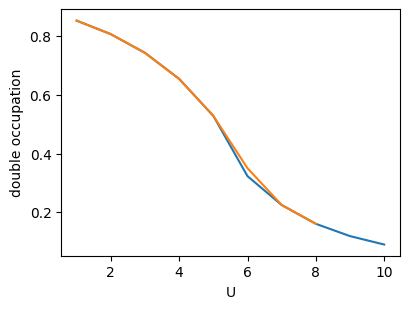

In [48]:
import matplotlib.pyplot as plt


idx = 6
plt.figure(figsize=(4,3))
plt.plot(Us_i.reshape(-1,10)[idx][::-1], docc_i.reshape(-1,10)[idx][::-1])
plt.plot(Us_m.reshape(-1,8)[-idx-1], docc_m.reshape(-1,8)[-idx-1])

# plt.ylim(1.0,2.0)
plt.tight_layout()
plt.xlabel("U")
plt.ylabel("double occupation")
plt.show()